#Initialize Data

In [35]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [36]:
url = 'https://raw.githubusercontent.com/EricYangg/4AI3-Walmart-Forecast/main/Datasets/features.csv'
features = pd.read_csv(url)

url = 'https://raw.githubusercontent.com/EricYangg/4AI3-Walmart-Forecast/main/Datasets/stores.csv'
stores = pd.read_csv(url)

url = 'https://raw.githubusercontent.com/EricYangg/4AI3-Walmart-Forecast/main/Datasets/test.csv'
test = pd.read_csv(url)

url = 'https://raw.githubusercontent.com/EricYangg/4AI3-Walmart-Forecast/main/Datasets/train.csv'
train = pd.read_csv(url)

url = 'https://raw.githubusercontent.com/EricYangg/4AI3-Walmart-Forecast/main/Datasets/sampleSubmission.csv'
sample = pd.read_csv(url)

For each row in the test set (store + department + date triplet), you should predict the weekly sales of that department. The Id column is formed by concatenating the Store, Dept, and Date with underscores (e.g. Store_Dept_2012-11-02).  The file should have a header and looks like the following:

In [37]:
features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [38]:
stores

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [39]:
test 

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False
...,...,...,...,...
115059,45,98,2013-06-28,False
115060,45,98,2013-07-05,False
115061,45,98,2013-07-12,False
115062,45,98,2013-07-19,False


In [40]:
sample

,Id,Weekly_Sales
0,1_1_2012-11-02,0
1,1_1_2012-11-09,0
2,1_1_2012-11-16,0
3,1_1_2012-11-23,0
4,1_1_2012-11-30,0
...,...,...
115059,45_98_2013-06-28,0
115060,45_98_2013-07-05,0
115061,45_98_2013-07-12,0
115062,45_98_2013-07-19,0


In [41]:
train

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [42]:
type(train['Date'][0])

str

In [43]:
train['Date'] = pd.to_datetime(train['Date']).astype('int64')
train['IsHoliday'] = train['IsHoliday']*1 

In [44]:
train

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,1265328000000000000,24924.50,0
1,1,1,1265932800000000000,46039.49,1
2,1,1,1266537600000000000,41595.55,0
3,1,1,1267142400000000000,19403.54,0
4,1,1,1267747200000000000,21827.90,0
...,...,...,...,...,...
421565,45,98,1348790400000000000,508.37,0
421566,45,98,1349395200000000000,628.10,0
421567,45,98,1350000000000000000,1061.02,0
421568,45,98,1350604800000000000,760.01,0


In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train.iloc[:,[0,1,2,4]], train.iloc[:,3], test_size=0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(337256, 4)
(84314, 4)
(337256,)
(84314,)


In [46]:
x_train

,Store,Dept,Date,IsHoliday
138466,15,3,1301616000000000000,0
289214,30,25,1276214400000000000,0
52351,6,27,1275609600000000000,0
203504,21,49,1322784000000000000,0
233606,24,55,1325808000000000000,0
...,...,...,...,...
259178,27,18,1350604800000000000,0
365838,39,36,1274400000000000000,0
131932,14,29,1272585600000000000,0
146867,15,90,1309478400000000000,0


In [47]:
x_test

,Store,Dept,Date,IsHoliday
272342,28,40,1325808000000000000,0
176581,18,93,1331251200000000000,0
354212,38,4,1306454400000000000,0
281444,29,33,1268352000000000000,0
124208,13,52,1288310400000000000,0
...,...,...,...,...
415987,45,30,1307664000000000000,0
193068,20,44,1319760000000000000,0
346600,37,1,1320364800000000000,0
380513,40,96,1268956800000000000,0


#Data Pre-processing:
* Normalize the data,
* Handle missing values,
* Check for outliers,
* Balance vs. imbalanced dataset,
* Features selection

#Normalize Data


In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

#Handle Missing Values

In [50]:
x_train.isna().sum()

Store        0
Dept         0
Date         0
IsHoliday    0
dtype: int64

In [51]:
x_test.isna().sum()

Store        0
Dept         0
Date         0
IsHoliday    0
dtype: int64

In [52]:
features.isna().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

#Check for outliers

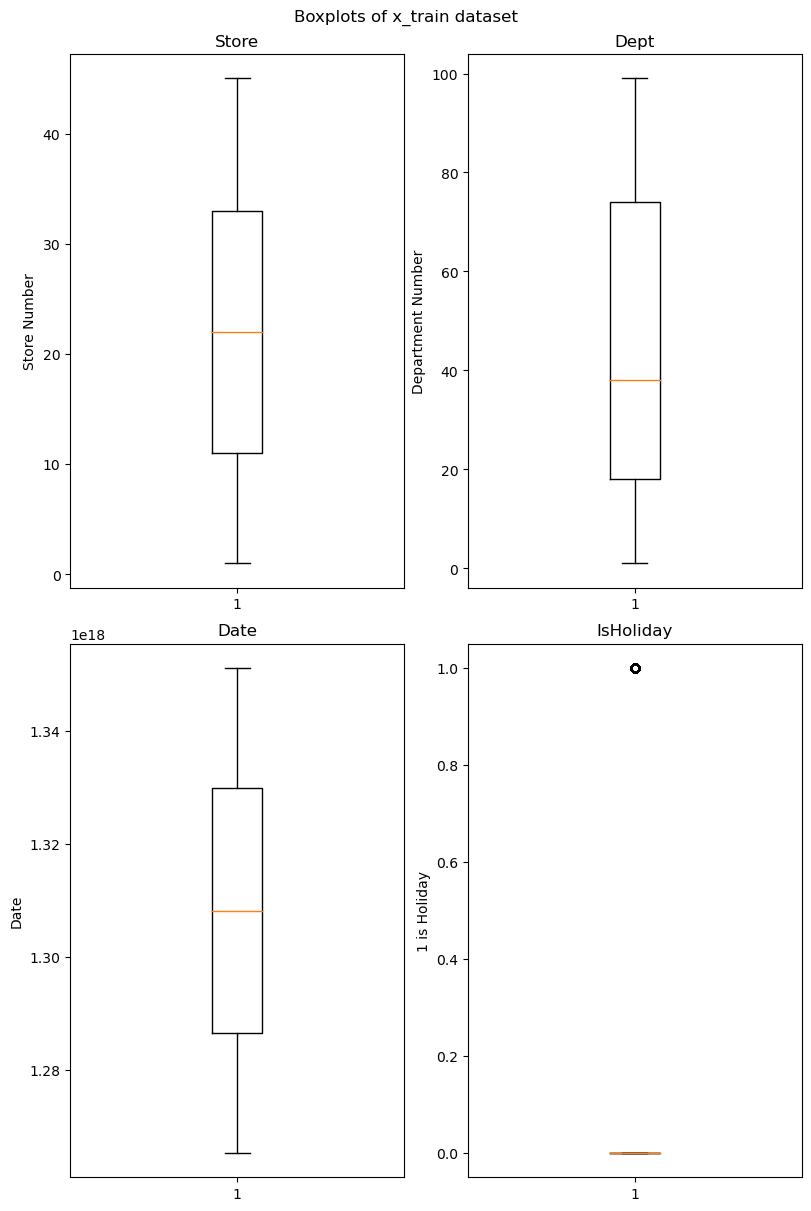

In [55]:
#fig, axs = plt.subplots(4, figsize=(8,12),constrained_layout=True)
fig, axs = plt.subplots(2,2, figsize=(8,12),constrained_layout=True)
fig.suptitle('Boxplots of x_train dataset')

axs[0,0].boxplot(x_train['Store'])
axs[0,0].set_title('Store')
axs[0,0].set(ylabel='Store Number')
axs[0,1].boxplot(x_train['Dept'])
axs[0,1].set_title('Dept')
axs[0,1].set(ylabel='Department Number')
axs[1,0].boxplot(x_train['Date'])
axs[1,0].set_title('Date')
axs[1,0].set(ylabel='Date')
axs[1,1].boxplot(x_train['IsHoliday'])
axs[1,1].set_title('IsHoliday')
axs[1,1].set(ylabel='1 is Holiday')
#fig.tight_layout(pad=2)
plt.show()

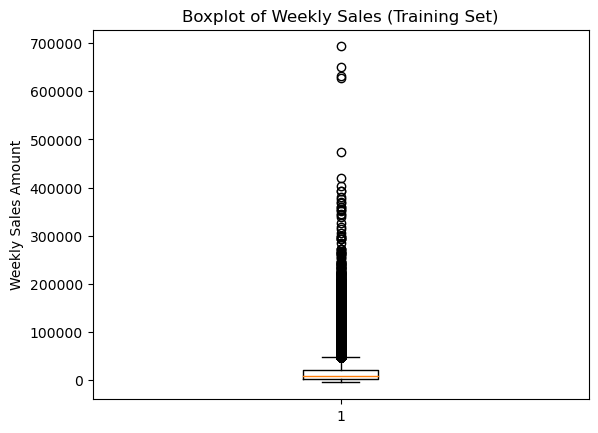

In [58]:
plt.boxplot(y_train)
plt.title('Boxplot of Weekly Sales (Training Set)')
plt.ylabel('Weekly Sales Amount')
plt.show()

#Balance vs Imbalanced Dataset

#Feature selection